In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import files
files.upload()

Saving DADOS_COVID_POR_ESTADO.csv to DADOS_COVID_POR_ESTADO.csv


{'DADOS_COVID_POR_ESTADO.csv': b',regiao,estado,coduf,populacaoTCU2019,FIM_MES,ano,casosNovos,obitosNovos\n0,Centro-Oeste,DF,53,3015268.0,2020-02-29,2020,0,0\n1,Centro-Oeste,DF,53,3015268.0,2020-03-31,2020,332,3\n2,Centro-Oeste,DF,53,3015268.0,2020-04-30,2020,1024,27\n3,Centro-Oeste,DF,53,3015268.0,2020-05-31,2020,8424,140\n4,Centro-Oeste,DF,53,3015268.0,2020-06-30,2020,39438,417\n5,Centro-Oeste,DF,53,3015268.0,2020-07-31,2020,57074,882\n6,Centro-Oeste,DF,53,3015268.0,2020-08-31,2020,55750,1052\n7,Centro-Oeste,DF,53,3015268.0,2020-09-30,2020,30203,734\n8,Centro-Oeste,DF,53,3015268.0,2020-10-31,2020,21000,428\n9,Centro-Oeste,DF,53,3015268.0,2020-11-30,2020,15901,247\n10,Centro-Oeste,DF,53,3015268.0,2020-12-31,2020,22555,329\n11,Centro-Oeste,GO,52,7018354.0,2020-02-29,2020,0,0\n12,Centro-Oeste,GO,52,7018354.0,2020-03-31,2020,65,1\n13,Centro-Oeste,GO,52,7018354.0,2020-04-30,2020,716,28\n14,Centro-Oeste,GO,52,7018354.0,2020-05-31,2020,2921,95\n15,Centro-Oeste,GO,52,7018354.0,2020-06-30,202

In [3]:
df = pd.read_csv('DADOS_COVID_POR_ESTADO.csv')
print(df.shape)
df.head()

(297, 9)


,Unnamed: 0,regiao,estado,coduf,populacaoTCU2019,FIM_MES,ano,casosNovos,obitosNovos
0,0,Centro-Oeste,DF,53,3015268.0,2020-02-29,2020,0,0
1,1,Centro-Oeste,DF,53,3015268.0,2020-03-31,2020,332,3
2,2,Centro-Oeste,DF,53,3015268.0,2020-04-30,2020,1024,27
3,3,Centro-Oeste,DF,53,3015268.0,2020-05-31,2020,8424,140
4,4,Centro-Oeste,DF,53,3015268.0,2020-06-30,2020,39438,417


In [4]:
def infoDf(df1):
  info_df = pd.DataFrame({'Colunas' : df1.columns,
                          'Tipo' : df1.dtypes,
                          'Unico': df1.nunique(),
                          'Tamanho': df1.shape[0],
                          'Missing': df1.isna().sum()                          
                          })
  info_df['% Unicos'] =  round(info_df['Unico']/info_df['Tamanho'], 3)
  info_df['% Missing'] = round(info_df['Missing']/info_df['Tamanho'], 3)
  return info_df

In [5]:
def missingData(df1, num=10):
  total = df1.isnull().sum().sort_values(ascending=False)
  percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
  return missing_data.head(num)

In [6]:
infoDf(df)

,Colunas,Tipo,Unico,Tamanho,Missing,% Unicos,% Missing
Unnamed: 0,Unnamed: 0,int64,297,297,0,1.000,0.0
regiao,regiao,object,5,297,0,0.017,0.0
estado,estado,object,27,297,0,0.091,0.0
coduf,coduf,int64,27,297,0,0.091,0.0
populacaoTCU2019,populacaoTCU2019,float64,27,297,0,0.091,0.0
FIM_MES,FIM_MES,object,11,297,0,0.037,0.0
ano,ano,int64,1,297,0,0.003,0.0
casosNovos,casosNovos,int64,270,297,0,0.909,0.0
obitosNovos,obitosNovos,int64,231,297,0,0.778,0.0


In [7]:
missingData(df, num=3)

,Total,Percent
obitosNovos,0,0.0
casosNovos,0,0.0
ano,0,0.0


In [8]:
df.describe()

,Unnamed: 0,coduf,populacaoTCU2019,ano,casosNovos,obitosNovos
count,297.000000,297.000000,2.970000e+02,297.0,297.000000,297.000000
mean,148.000000,29.111111,7.783227e+06,2020.0,25845.026936,656.393939
std,85.880731,12.802731,9.093713e+06,0.0,37268.623572,1123.461547
min,0.000000,11.000000,6.057610e+05,2020.0,0.000000,0.000000
25%,74.000000,17.000000,2.778986e+06,2020.0,2381.000000,48.000000
50%,148.000000,27.000000,4.018650e+06,2020.0,15231.000000,276.000000
75%,222.000000,41.000000,9.557071e+06,2020.0,34464.000000,734.000000
max,296.000000,53.000000,4.591905e+07,2020.0,262038.000000,8234.000000


In [9]:
df_e = df.copy()

In [10]:
df_e = df_e.drop(columns=['Unnamed: 0'])

In [11]:
df_e.FIM_MES =df_e['FIM_MES'].astype('datetime64')

# Histograma

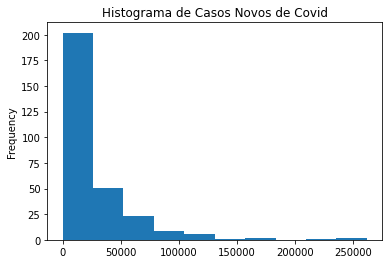

In [34]:
df_e.casosNovos.plot.hist(title='Histograma de Casos Novos de Covid')

Por estado

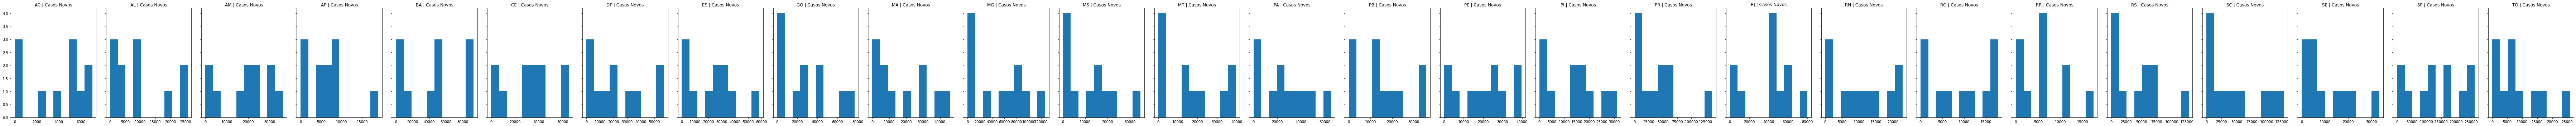

In [53]:
estados = df_e.sort_values(by=['estado']).estado.unique()
fig, axs = plt.subplots(1, ncols=len(estados), figsize=(100,5), sharey=True, tight_layout=True)
i = 0
for uf in estados:
  filtro = (df_e.estado == uf)
  x = df_e.casosNovos[filtro]
  axs[i].hist(x)
  axs[i].set_title(str(uf)+' | Casos Novos')
  i+=1


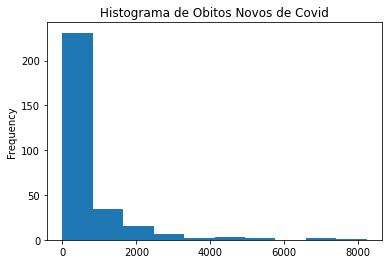

In [35]:
df_e.obitosNovos.plot.hist(title='Histograma de Obitos Novos de Covid')

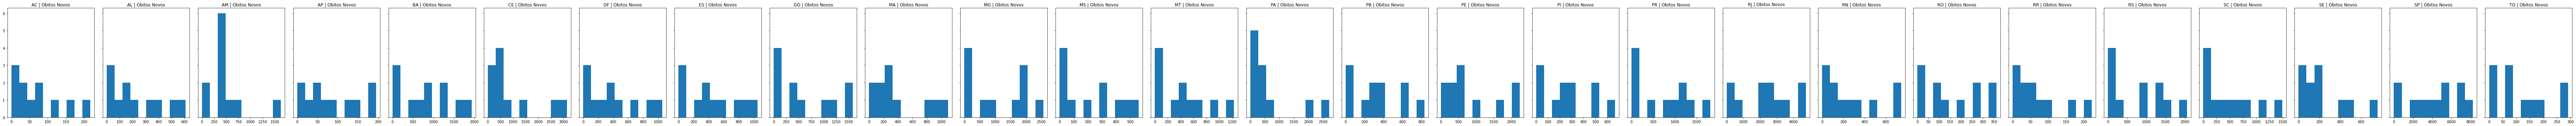

In [54]:
estados = df_e.sort_values(by=['estado']).estado.unique()
fig, axs = plt.subplots(1, ncols=len(estados), figsize=(100,5), sharey=True, tight_layout=True)
i = 0
for uf in estados:
  filtro = (df_e.estado == uf)
  x = df_e.obitosNovos[filtro]
  axs[i].hist(x)
  axs[i].set_title(str(uf)+' | Obitos Novos')
  i+=1

# Boxplot

Text(0.5, 1.0, 'Boxplot de Casos Novos por Estado')

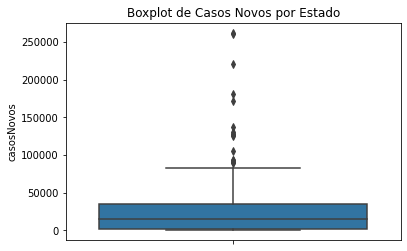

In [17]:
sns.boxplot(y='casosNovos', data  =df_e).set_title('Boxplot de Casos Novos')

Text(0.5, 1.0, 'Boxplot de Casos Novos por Estado')

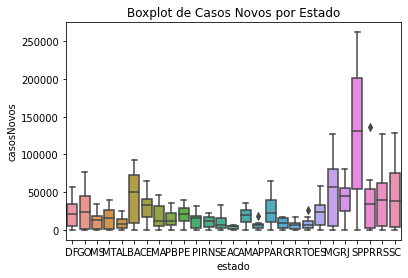

In [16]:
sns.boxplot(x='estado', y='casosNovos', data  =df_e).set_title('Boxplot de Casos Novos por Estado')

Text(0.5, 1.0, 'Boxplot de Obitos Novos')

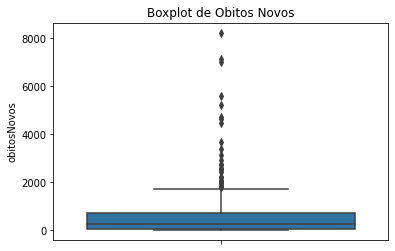

In [36]:
sns.boxplot(y='obitosNovos', data  =df_e).set_title('Boxplot de Obitos Novos')

Text(0.5, 1.0, 'Boxplot de Obitos Novos por Estado')

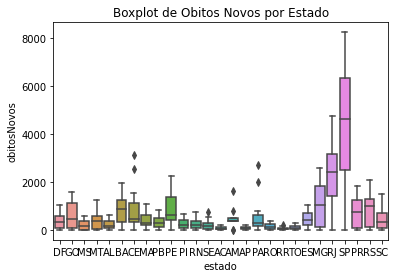

In [37]:
sns.boxplot(x='estado', y='obitosNovos', data  =df_e).set_title('Boxplot de Obitos Novos por Estado')

# Analise das Datas

Nº de Casos por Meses

Text(0.5, 1.0, 'Numero de Casos Novos Por Mês em 2020')

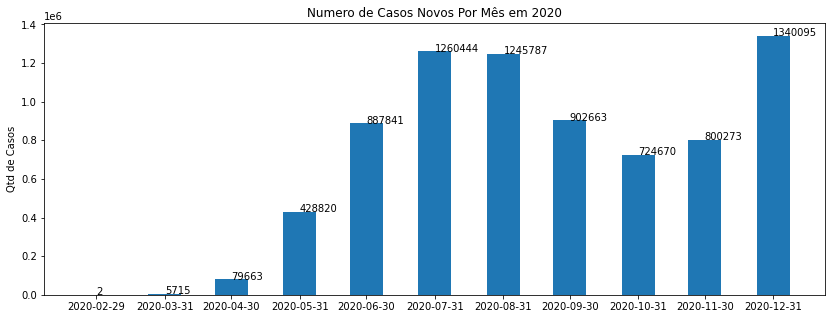

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
df_aux = df_e.groupby(['FIM_MES'], as_index=False, dropna=False)['casosNovos'].sum()
x = df_aux['FIM_MES']
y = df_aux['casosNovos']

axes.bar(x,y , width=15)
axes.set_xticks(x)
axes.set_ylabel('Qtd de Casos')
for idx in range(0, len(x)):
  axes.text(x[idx],y[idx], y[idx], fontsize=10)

axes.set_title('Numero de Casos Novos Por Mês em 2020')


Nº de Obitos por Meses

Text(0.5, 1.0, 'Numero de Obitos Novos Por Mês em 2020')

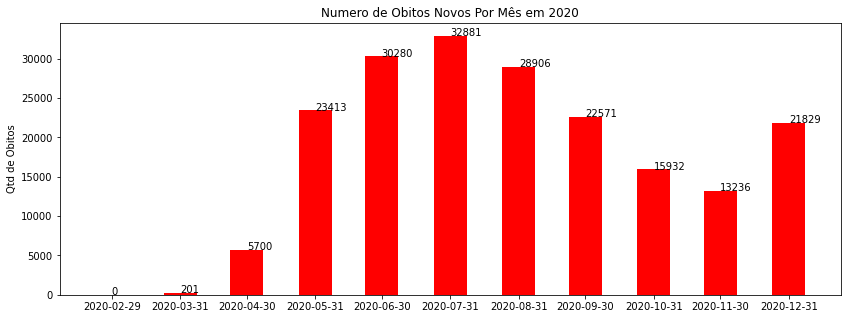

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
df_aux = df_e.groupby(['FIM_MES'], as_index=False, dropna=False)['obitosNovos'].sum()
x = df_aux['FIM_MES']
y = df_aux['obitosNovos']

axes.bar(x, y, color='red', width=15)
axes.set_xticks(x)
axes.set_ylabel('Qtd de Obitos')
for idx in range(0, len(x)):
  axes.text(x[idx],y[idx], y[idx], fontsize=10)

axes.set_title('Numero de Obitos Novos Por Mês em 2020')

Nº de Casos Novos Acumulados

Text(0.5, 1.0, 'Numero de Casos Novos Por Mês em 2020')

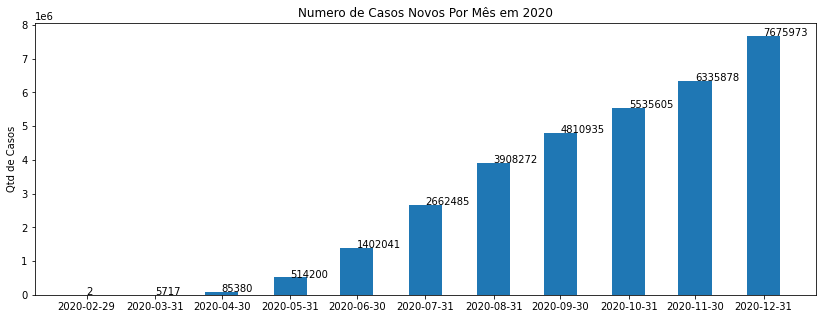

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
serie = df_e.groupby(['FIM_MES'])['casosNovos'].sum().cumsum(skipna=False, axis=0)
x = serie.index
y = serie

axes.bar(x,y , width=15)
axes.set_xticks(x)
axes.set_ylabel('Qtd de Casos')
for idx in range(0, len(x)):
  axes.text(x[idx],y[idx], y[idx], fontsize=10)

axes.set_title('Numero de Casos Novos Por Mês em 2020')

Nº de Obitos Novos Acumulados

Text(0.5, 1.0, 'Numero de Obitos Novos Por Mês em 2020')

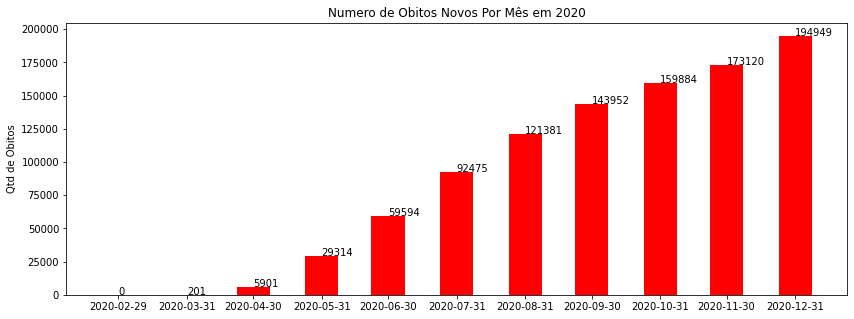

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
serie = df_e.groupby(['FIM_MES'])['obitosNovos'].sum().cumsum(skipna=False, axis=0)
x = serie.index
y = serie

axes.bar(x,y, color='red', width=15)
axes.set_xticks(x)
axes.set_ylabel('Qtd de Obitos')
for idx in range(0, len(x)):
  axes.text(x[idx],y[idx], y[idx], fontsize=10)
axes.set_title('Numero de Obitos Novos Por Mês em 2020')

# Por Estados

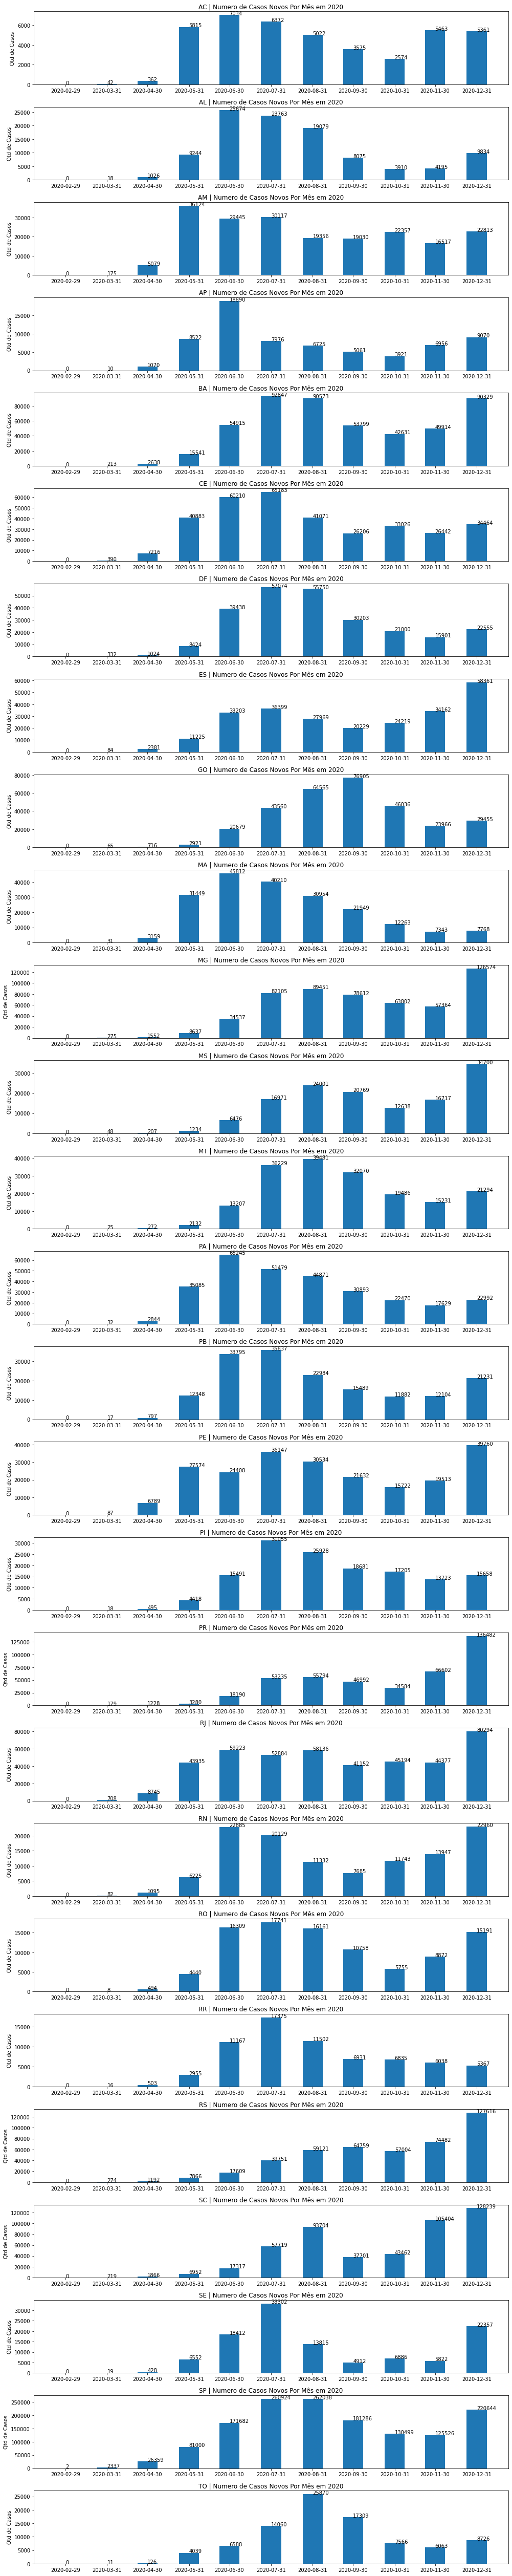

In [ ]:
estados = df_e.estado.sort_values().unique()
fig, axes = plt.subplots(nrows=len(estados), ncols=1, figsize=(14,70))
i = 0
for uf in estados:
  df_aux = df_e[df_e.estado==uf].groupby(['FIM_MES'], as_index=False, dropna=False)['casosNovos'].sum()
  x = df_aux['FIM_MES']
  y = df_aux['casosNovos']

  axes[i].bar(x, y, width=15)
  axes[i].set_xticks(x)
  axes[i].set_ylabel('Qtd de Casos')
  for idx in range(0, len(x)):
    axes[i].text(x[idx],y[idx], y[idx], fontsize=10)

  axes[i].set_title(uf+' | Numero de Casos Novos Por Mês em 2020')
  i=i+1
fig.tight_layout()

Nº de Obitos por Estado

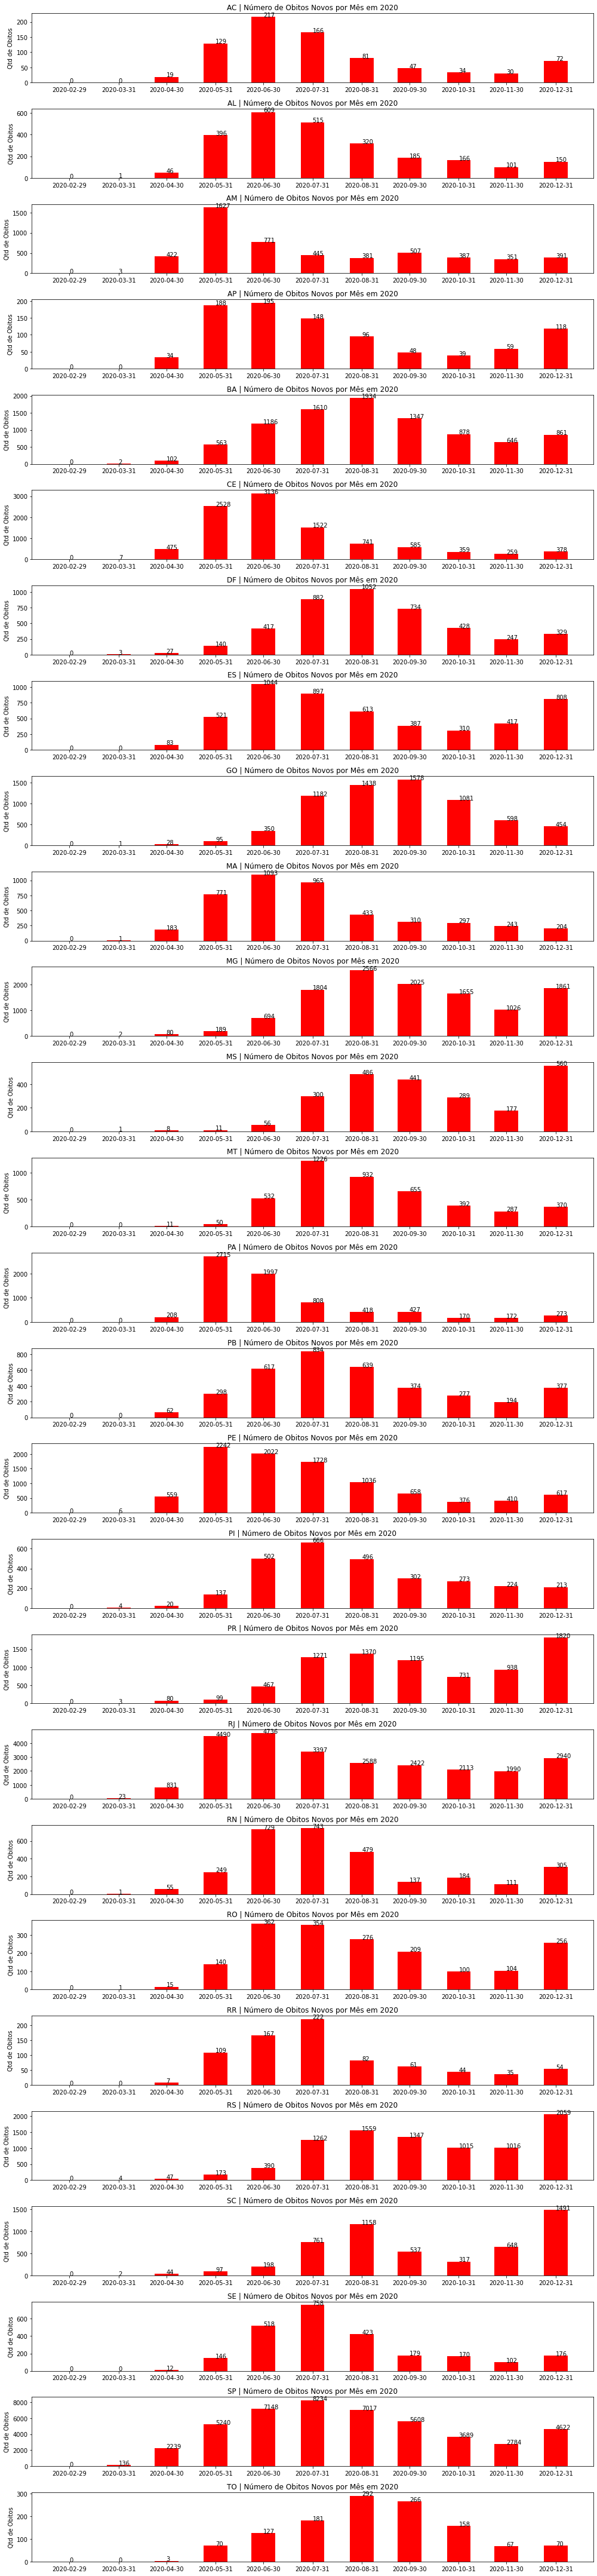

In [ ]:
estados = df_e.estado.sort_values().unique()
fig, axes = plt.subplots(nrows=len(estados), ncols=1, figsize=(14,60))
i = 0
for uf in estados:
  df_aux = df_e[df_e.estado == uf].groupby(['FIM_MES'], as_index=False, dropna=False)['obitosNovos'].sum()
  x = df_aux['FIM_MES']
  y = df_aux['obitosNovos']

  axes[i].bar(x, y, color='red', width=15)
  axes[i].set_xticks(x)
  axes[i].set_ylabel('Qtd de Obitos')
  [axes[i].text(x[idx], y[idx], y[idx], fontsize=10) for idx in range(0, len(x))]

  axes[i].set_title(uf + ' | Número de Obitos Novos por Mês em 2020')
  i+=1

fig.tight_layout()

Nº de Casos Novo Acumulados por Estados

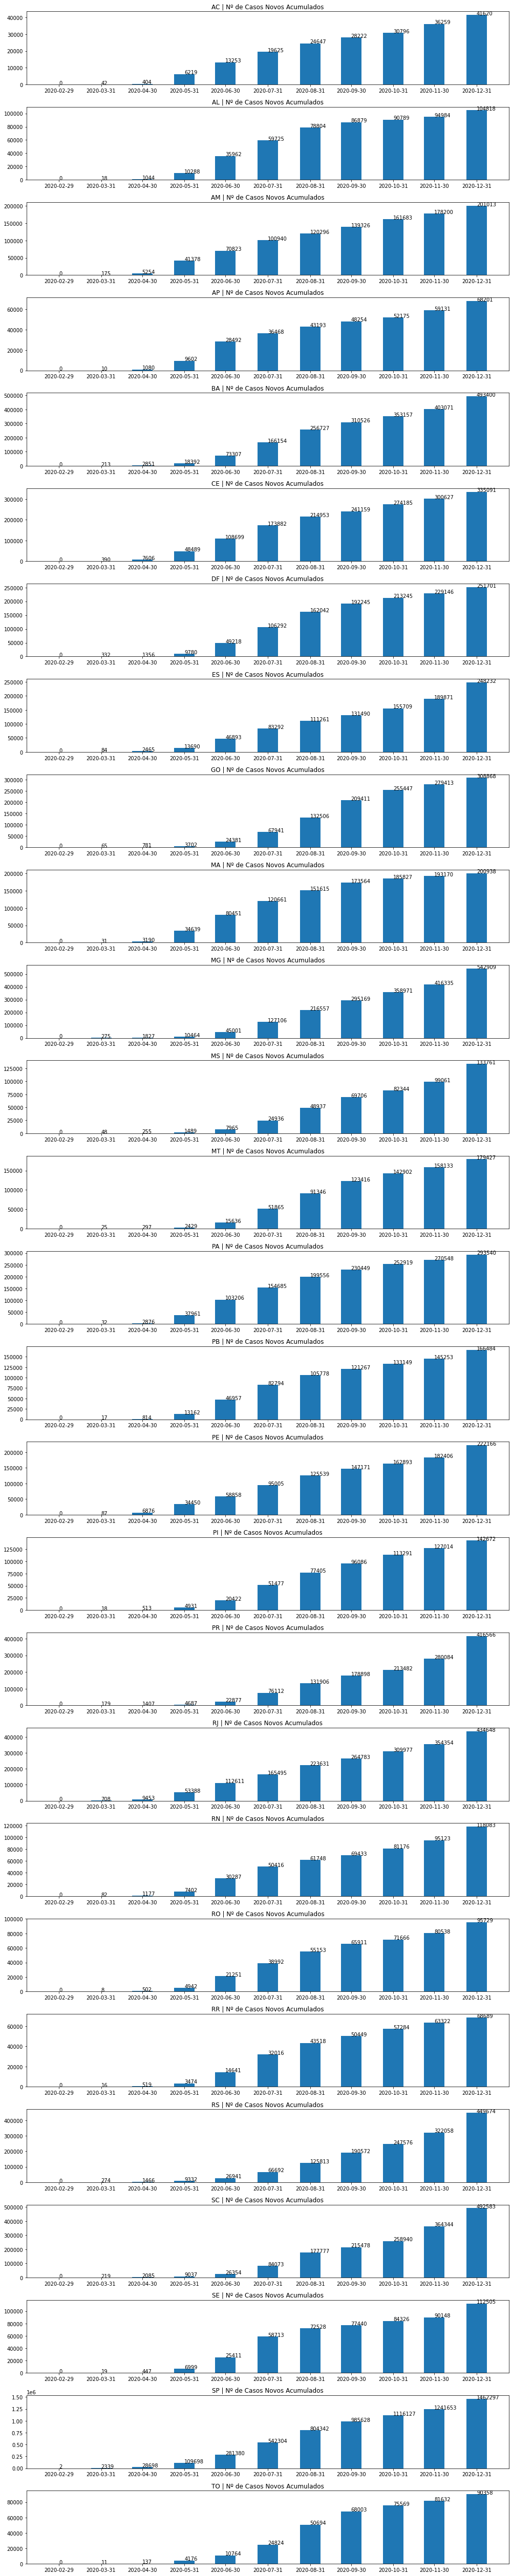

In [ ]:
estados = df_e.estado.sort_values().unique()
fig, axes = plt.subplots(nrows=len(estados), ncols=1, figsize=(14,70))
i = 0
for uf in estados:
  serie = df_e[df_e.estado == uf ].groupby(['FIM_MES'])['casosNovos'].sum().cumsum(skipna=False, axis=0)
  x = serie.index
  y = serie

  axes[i].bar(x, y, width=15)
  axes[i].set_xticks(x)
  axes[i].set_label('Qtd de Casos')
  [axes[i].text(x[idx], y[idx], y[idx], fontsize=10) for idx in range(0, len(x))]
  axes[i].set_title(uf + ' | Nº de Casos Novos Acumulados')

  i+=1


fig.tight_layout()


Nº de Obitos Novos Acumulados por Estados

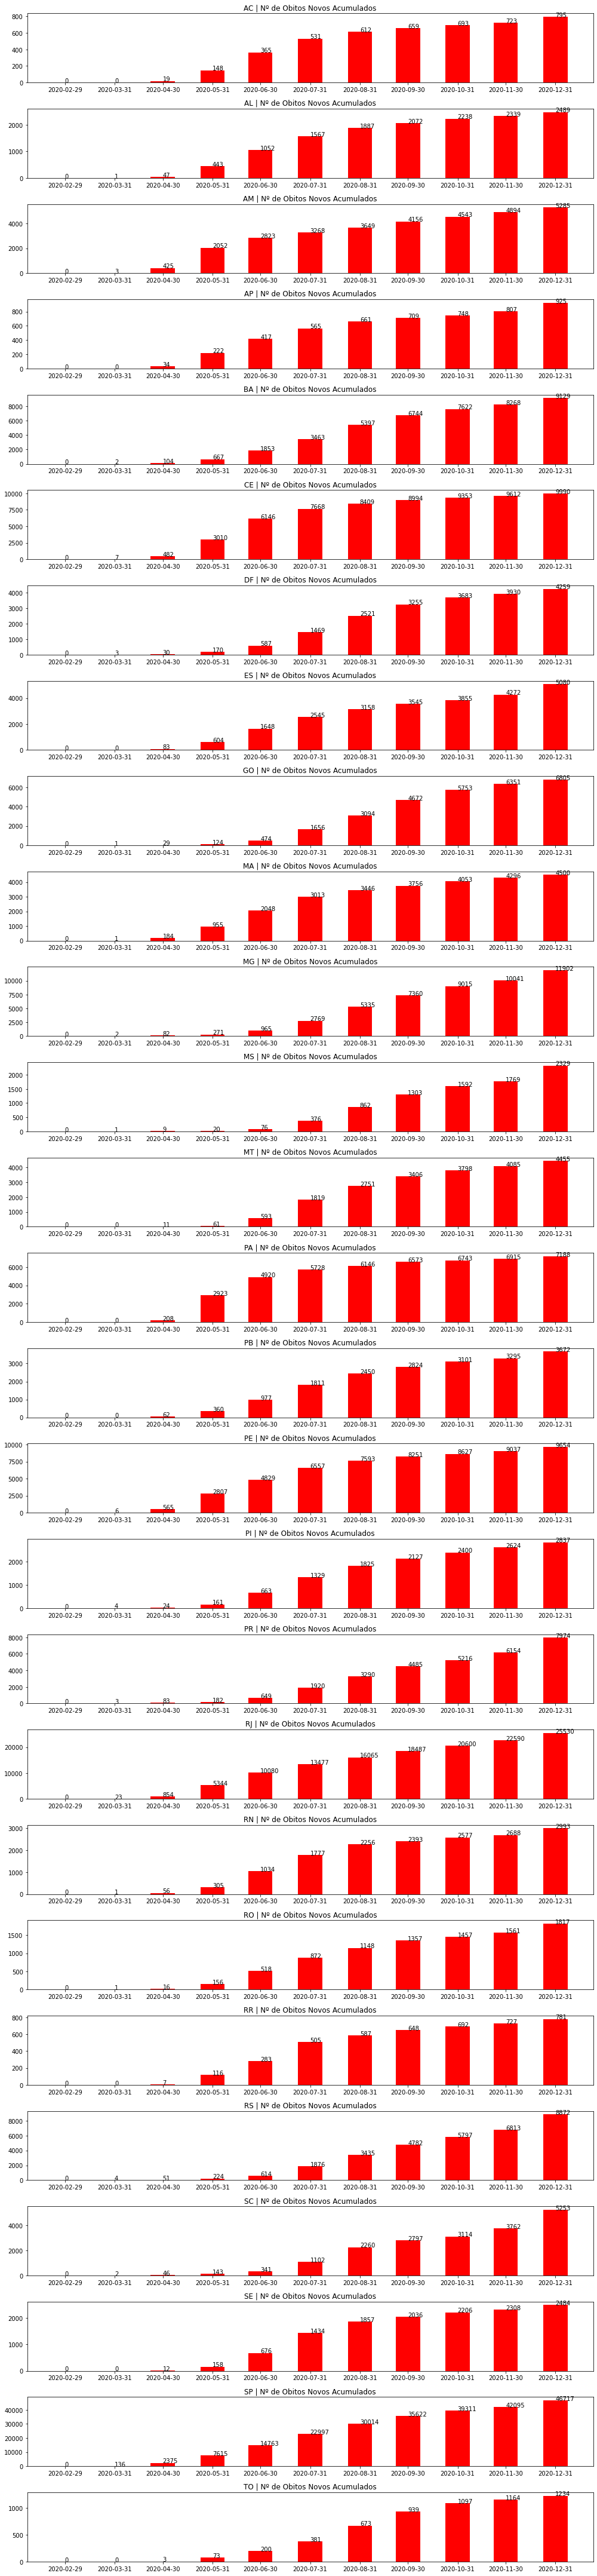

In [ ]:
estados = df_e.estado.sort_values().unique()
fig, axes = plt.subplots(nrows=len(estados), ncols=1, figsize=(14,60))
i = 0
for uf in estados:
  serie = df_e[df_e.estado == uf].groupby(['FIM_MES'])['obitosNovos'].sum().cumsum(skipna=False, axis=0)
  x = serie.index
  y = serie

  axes[i].bar(x, y, color='red', width=15)
  axes[i].set_xticks(x)
  axes[i].set_label('Qtd Obitos')
  [axes[i].text(x[idx], y[idx], y[idx], fontsize=10) for idx in range(0, len(x))]
  axes[i].set_title(uf + ' | Nº de Obitos Novos Acumulados')
  i+=1

fig.tight_layout()

# Por Região

Nº de Casos Novos por Região

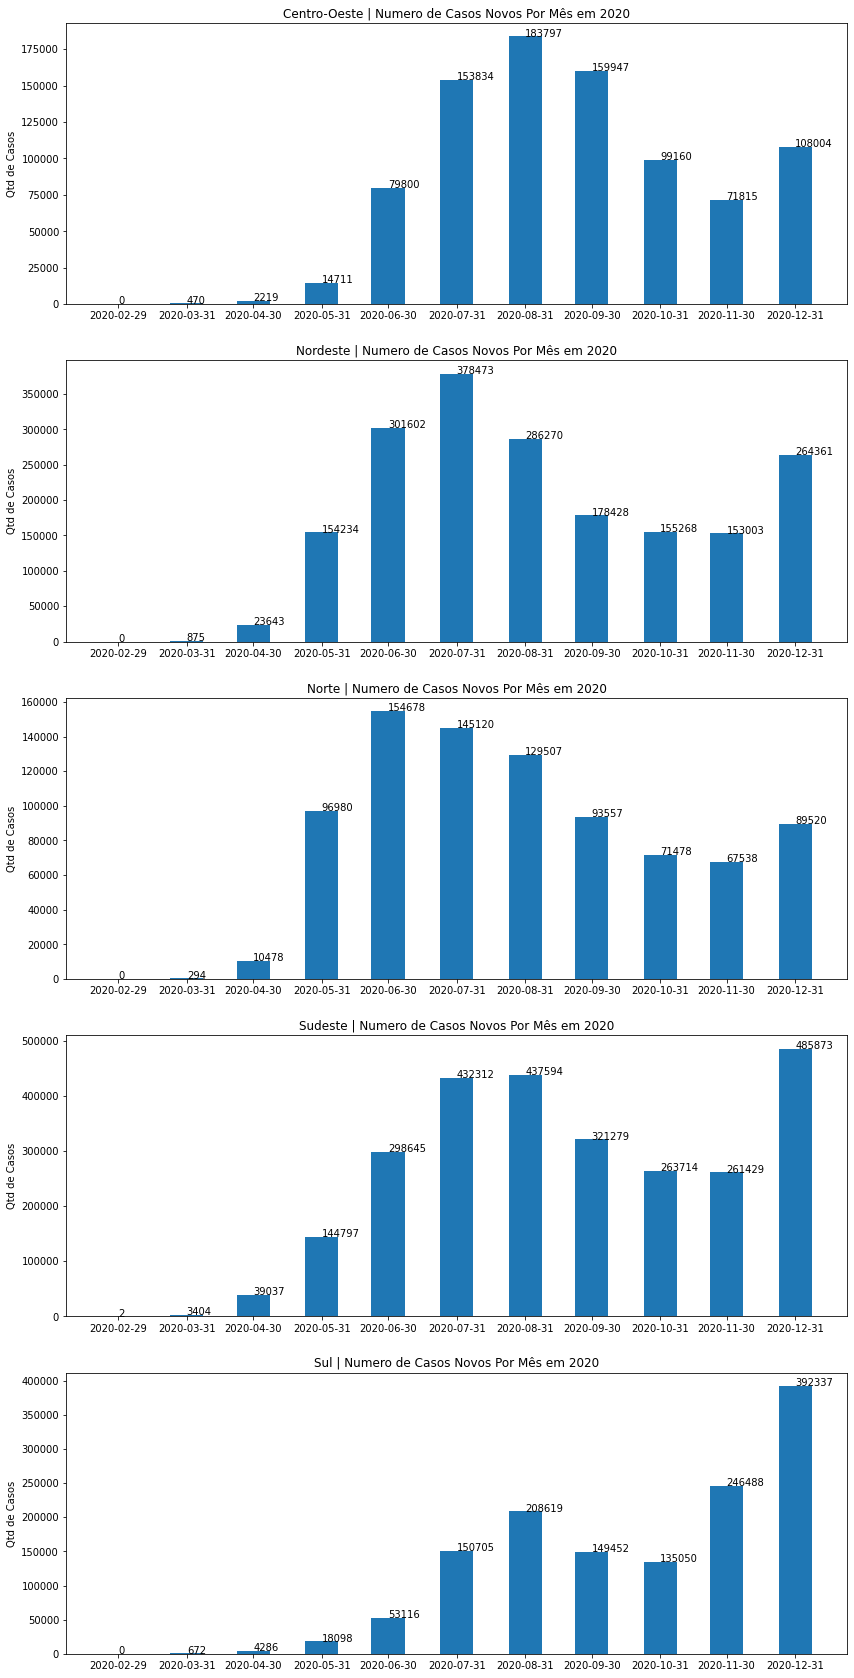

In [ ]:
regiao = df_e.regiao.sort_values().unique()
fig, axes = plt.subplots(nrows=len(regiao), ncols=1, figsize=(14,30))
i = 0
for reg in regiao:
  df_aux = df_e[df_e.regiao == reg].groupby(['FIM_MES'], as_index=False, dropna=False)['casosNovos'].sum()
  x = df_aux['FIM_MES']
  y = df_aux['casosNovos']

  axes[i].bar(x, y, width=15)
  axes[i].set_xticks(x)
  axes[i].set_ylabel('Qtd de Casos')
  for idx in range(0, len(x)):
    axes[i].text(x[idx],y[idx], y[idx], fontsize=10)

  axes[i].set_title(reg+' | Numero de Casos Novos Por Mês em 2020')
  i=i+1
#fig.tight_layout()

Nº de Obitos por Região

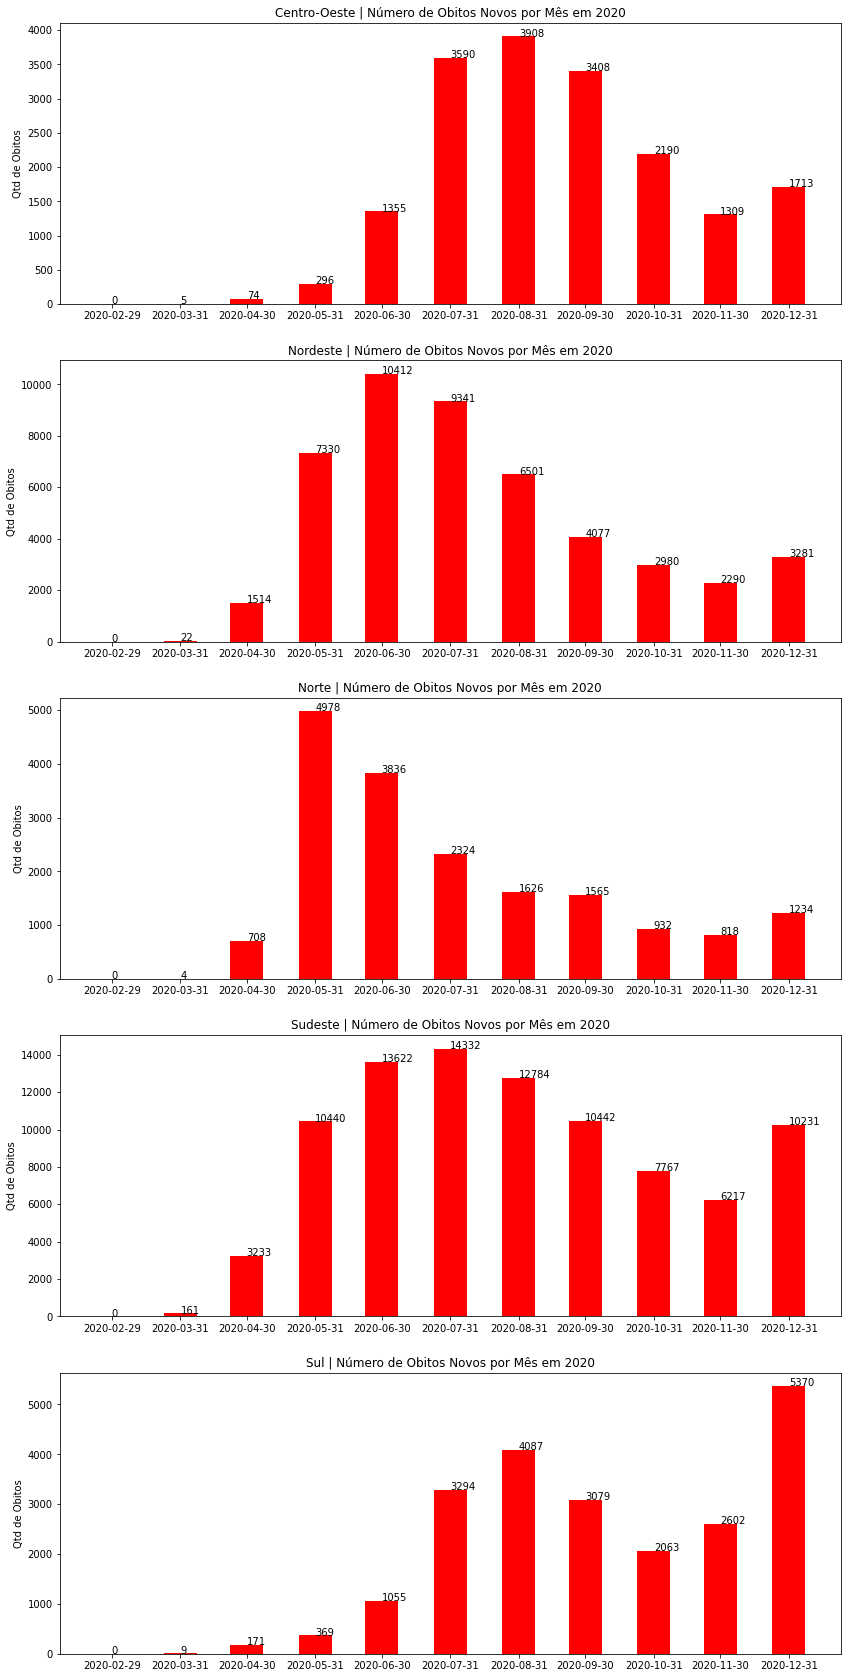

In [ ]:
regiao = df_e.regiao.sort_values().unique()
fig, axes = plt.subplots(nrows=len(regiao), ncols=1, figsize=(14,30))
i = 0
for reg in regiao:
  df_aux = df_e[df_e.regiao == reg].groupby(['FIM_MES'], as_index=False, dropna=False)['obitosNovos'].sum()
  x = df_aux['FIM_MES']
  y = df_aux['obitosNovos']

  axes[i].bar(x, y, color='red', width=15)
  axes[i].set_xticks(x)
  axes[i].set_ylabel('Qtd de Obitos')
  [axes[i].text(x[idx], y[idx], y[idx], fontsize=10) for idx in range(0, len(x))]

  axes[i].set_title(reg + ' | Número de Obitos Novos por Mês em 2020')
  i+=1

#fig.tight_layout()

Nº de Casos Novo Acumulados por Região



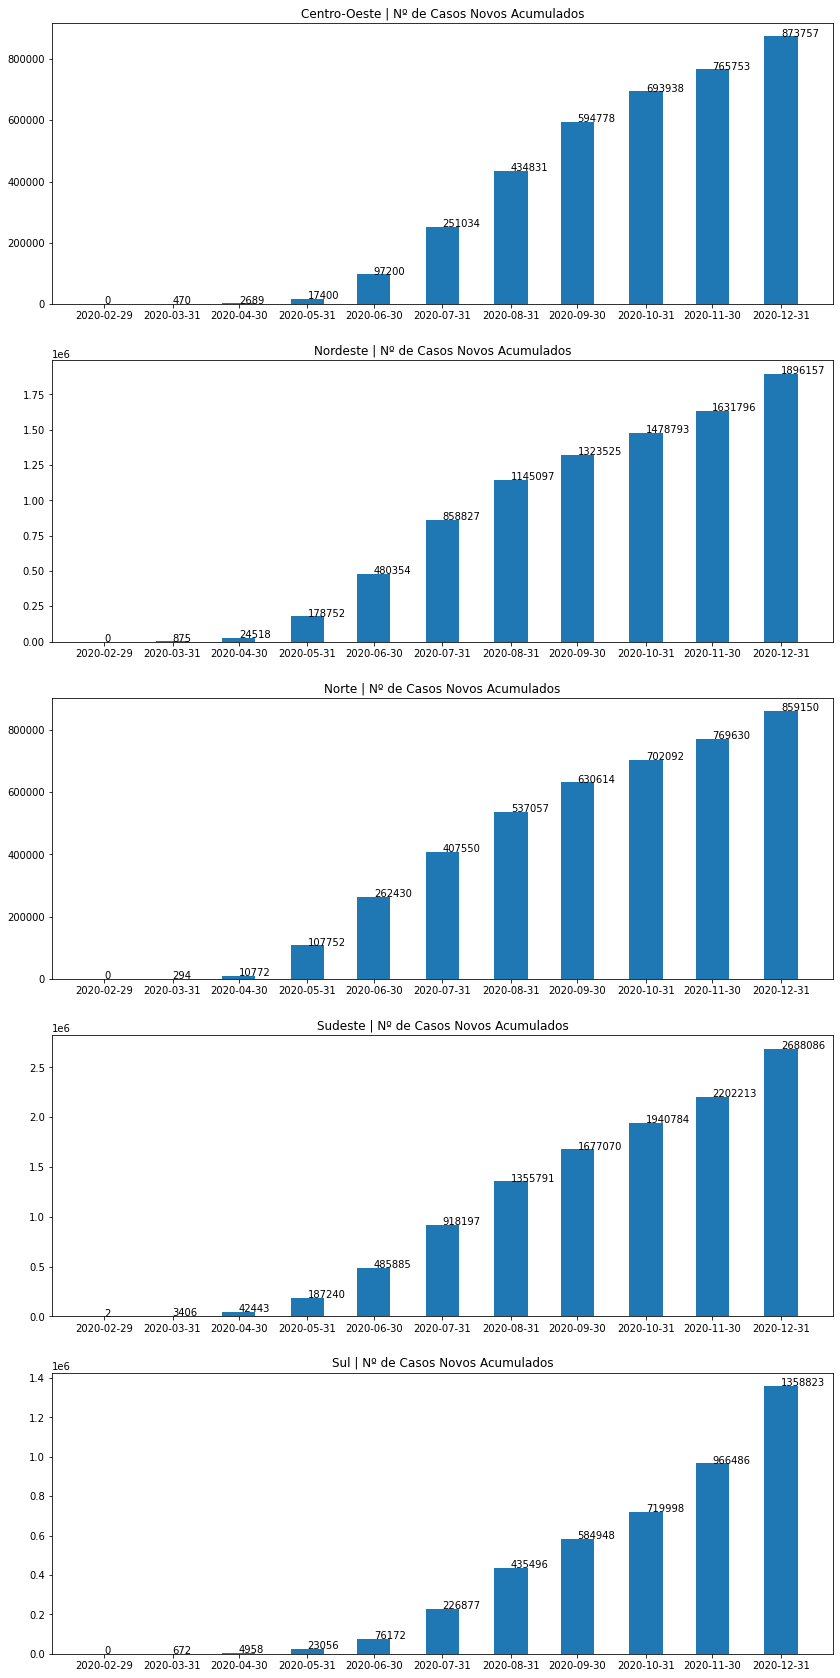

In [ ]:
regiao = df_e.regiao.sort_values().unique()
fig, axes = plt.subplots(nrows=len(regiao), ncols=1, figsize=(14,30))
i = 0
for reg in regiao:
  serie = df_e[df_e.regiao == reg ].groupby(['FIM_MES'])['casosNovos'].sum().cumsum(skipna=False, axis=0)
  x = serie.index
  y = serie

  axes[i].bar(x, y, width=15)
  axes[i].set_xticks(x)
  axes[i].set_label('Qtd de Casos')
  [axes[i].text(x[idx], y[idx], y[idx], fontsize=10) for idx in range(0, len(x))]
  axes[i].set_title(reg + ' | Nº de Casos Novos Acumulados')

  i+=1


#fig.tight_layout()


Nº de Obitos Novos Acumulados por Estados

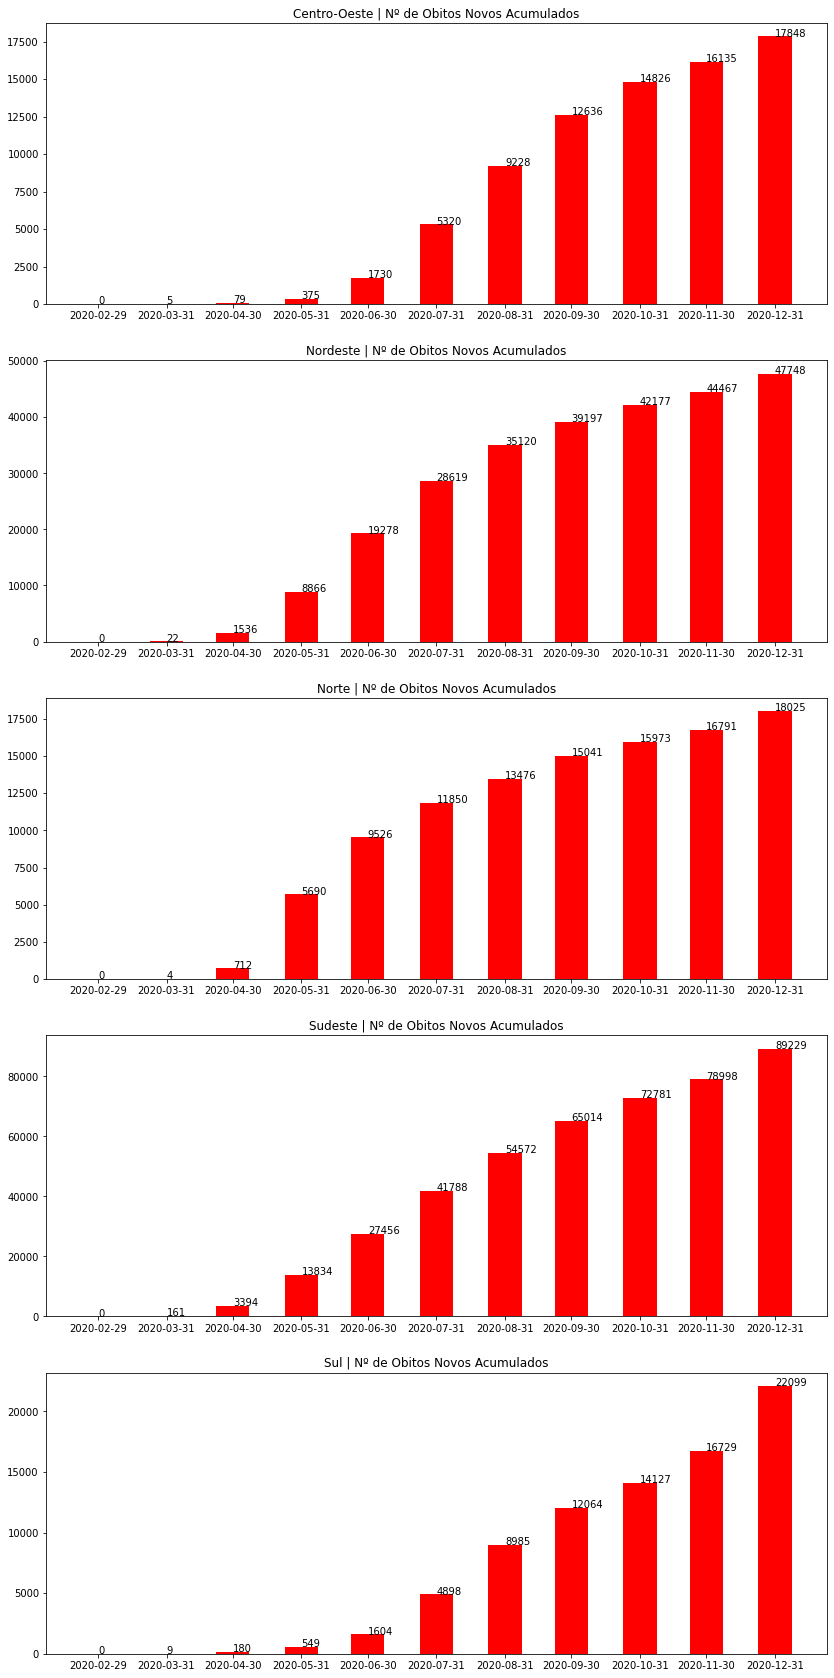

In [ ]:
regiao = df_e.regiao.sort_values().unique()
fig, axes = plt.subplots(nrows=len(regiao), ncols=1, figsize=(14,30))
i = 0
for reg in regiao:
  serie = df_e[df_e.regiao == reg].groupby(['FIM_MES'])['obitosNovos'].sum().cumsum(skipna=False, axis=0)
  x = serie.index
  y = serie

  axes[i].bar(x, y, color='red', width=15)
  axes[i].set_xticks(x)
  axes[i].set_label('Qtd Obitos')
  [axes[i].text(x[idx], y[idx], y[idx], fontsize=10) for idx in range(0, len(x))]
  axes[i].set_title(reg + ' | Nº de Obitos Novos Acumulados')
  i+=1

#fig.tight_layout()